In [1]:
## library(igraph)
library(Seurat)
library(tidyverse)
library(ggplot2)
library(ggrepel)
library(ggbeeswarm)
library(patchwork)
library(writexl)
options(ggrepel.max.overlaps = Inf)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   0.3.4
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
cgsf_all = qs::qread('_targets/objects/combined_gost_seurat_formatted')
cgsf_all %>% head(1)

tag                                                                data_day
1 Agrp___all.obob14v14__v__all.obob14vBL6___bl6_grouping.neg_vs_none all     
  cluster fgf1_day fgf1_comparison bl6_day bl6_comparison grouping     cells_a
1 Agrp    all      obob14v14       all     obob14vBL6     bl6_grouping neg    
  cells_b ⋯ recall     term_id    source term_name         
1 none    ⋯ 0.07630029 GO:0048731 GO:BP  system development
  effective_domain_size source_order parents               
1 26856                 13640        GO:0007275, GO:0048856
  evidence_codes                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
1 IMP,ISS ISO IEA,IEA,IMP ISO IBA IEA,IEA,IEA,IDA IMP IGI ISO IBA TAS IEA,IDA,IDA IMP,IBA,IMP,IDA IBA,IMP,IGI,IMP,IMP,IMP IGI IEP ISO IBA TAS NAS IEA,IEA,IMP,ISO,ISO IEA,ISS,IMP,IEA,ISO,ISO IEA,IDA IMP ISS IEA,IMP,IMP,IMP IEA,IMP IGI,IDA IMP IGI ISO IBA IEA,ISO,ISO,IMP IGI,IDA IMP ISO IBA IEA,IEA,IMP IGI,IMP ISS ISO IEA,IEA,IBA IEA,IDA IMP ISO IBA TAS IEA,IMP,IDA IMP IGI,IMP,IMP,IDA IMP ISS ISO IBA IEA,IMP,IEA,IDA ISO IEA,IDA IMP IEA,IMP IGI ISO IEA,IGI IEA,ISO IEA,IMP IGI ISO IEA,ISS ISO IBA IEA,IDA IMP ISS ISO IEA,IMP NAS IEA,IGI,IMP,IMP IGI,IMP,IMP,IMP IEA,ISS ISO IEA,IMP I

In [3]:
combined_deg_seurat_all = qs::qread('_targets/objects/combined_deg_seurat_formatted')
combined_deg_seurat_all %>% head

tag,data_day,cluster,fgf1_day,fgf1_comparison,bl6_day,bl6_comparison,grouping,cells_a,cells_b,GeneID,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,ensmusg,gsea_sort_score
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
Agrp___all.obob14v14__v__all.obob14vBL6___bl6_grouping.neg_vs_none,all,Agrp,all,obob14v14,all,obob14vBL6,bl6_grouping,neg,none,Dppa1,5.825508e-116,4.980929,0.583,0.040,1.165102e-112,ENSMUSG00000064010,557.5335
Agrp___all.obob14v14__v__all.obob14vBL6___bl6_grouping.neg_vs_none,all,Agrp,all,obob14v14,all,obob14vBL6,bl6_grouping,neg,none,Adamts4,9.508607e-88,5.170633,0.634,0.161,1.901721e-84,ENSMUSG00000006403,432.8898
Agrp___all.obob14v14__v__all.obob14vBL6___bl6_grouping.neg_vs_none,all,Agrp,all,obob14v14,all,obob14vBL6,bl6_grouping,neg,none,Filip1,5.139544e-150,2.655990,0.978,0.594,1.027909e-146,ENSMUSG00000034898,387.7428
Agrp___all.obob14v14__v__all.obob14vBL6___bl6_grouping.neg_vs_none,all,Agrp,all,obob14v14,all,obob14vBL6,bl6_grouping,neg,none,Mtnr1a,8.721380e-107,3.689482,0.663,0.182,1.744276e-103,ENSMUSG00000054764,379.1252
Agrp___all.obob14v14__v__all.obob14vBL6___bl6_grouping.neg_vs_none,all,Agrp,all,obob14v14,all,obob14vBL6,bl6_grouping,neg,none,Aox4,9.833022e-85,4.407861,0.502,0.028,1.966604e-81,ENSMUSG00000038242,355.7421
Agrp___all.obob14v14__v__all.obob14vBL6___bl6_grouping.neg_vs_none,all,Agrp,all,obob14v14,all,obob14vBL6,bl6_grouping,neg,none,Sult2a8,3.020312e-123,2.465192,0.693,0.137,6.040624e-120,ENSMUSG00000030378,293.8975


In [4]:
nhgc = qs::qread('_targets/objects/nhgc_Agrp___Day14.obob14v14__v__Day14.obobBL6d14') # Astrocytes___Day14.obob14v14__v__Day14.obobBL6d14___fgf1_grouping.pos_vs_none
nhgc %>% group_by(fgf1_grouping) %>% summarise(n=n())
nhgc %>% group_by(restored_grouping) %>% summarise(n=n())
# don't worry about this now, just state all markers for all clusters you want

fgf1_grouping,n
<chr>,<int>
neg,233
none,1983


restored_grouping,n
<fct>,<int>
neg_restored,233
none,1983


In [5]:
tag2 = combined_deg_seurat_all %>% 
    pull(tag) %>% unique %>%
    str_split(pattern = "___") %>%
    map_chr(~if (length(.x) >= 3) paste(.x[1:2], collapse = "___") else .x[1]) %>%
    unique
        
tag2_tibble = tag2 %>% tibble(tag2=.) %>%
mutate(path_to_target = paste0('_targets/objects/nhgc_', tag2)) %>%
mutate(obj = purrr::map(path_to_target, ~if (file.exists(.x)) qs::qread(.x) else NA))
    
combined_tibble <- tag2_tibble %>%
  mutate(obj = map2(obj, tag2, ~if (!is.na(.x)) mutate(.x, tag2 = .y) else tibble())) %>%
  pull(obj) %>%
  map_dfr(identity)

Warning message:
“There were 305 warnings in `mutate()`.
The first warning was:
ℹ In argument: `obj = map2(obj, tag2, ~if (!is.na(.x)) mutate(.x, tag2 = .y)
  else tibble())`.
Caused by warning in `if (!is.na(.x)) ...`:
! the condition has length > 1 and only the first element will be used
ℹ Run `dplyr::last_dplyr_warnings()` to see the 304 remaining warnings.”


In [10]:
library(dplyr)
library(tidyr)

# Tibble for fgf1_grouping
fgf1_tibble <- combined_tibble %>% 
  filter(fgf1_grouping %in% c('neg', 'none', 'pos')) %>%
  group_by(tag2, fgf1_grouping) %>%
  summarise(count = n(), .groups = "drop") %>%
  pivot_wider(names_from = fgf1_grouping, values_from = count, names_prefix = "fgf1_", values_fill = 0)

# Tibble for fgf1_grouping with _restored
restored_tibble <- combined_tibble %>% 
  mutate(fgf1_grouping_restored = str_replace_all(fgf1_grouping, c("neg" = "neg_restored", "pos" = "pos_restored"))) %>%
  filter(fgf1_grouping_restored %in% c('neg_restored', 'none', 'pos_restored')) %>%
  group_by(tag2, fgf1_grouping_restored) %>%
  summarise(count = n(), .groups = "drop") %>%
  pivot_wider(names_from = fgf1_grouping_restored, values_from = count, names_prefix = "restored_", values_fill = 0)



In [12]:
n_cells_cutoff = 250

# Create the first tibble
fgf1_tibble_new <- fgf1_tibble %>%
  pivot_longer(cols = starts_with("fgf1_"), names_to = "grouping", values_to = "count") %>%
  mutate(grouping = str_replace(grouping, "fgf1_", "")) %>%
  mutate(polarity1 = ifelse(grouping == "none", NA, grouping),
         polarity2 = ifelse(grouping == "none", grouping, "none")) %>%
  mutate(tag = paste0(tag2, "___fgf1_grouping.", polarity1, "_vs_", polarity2)) %>%
  mutate(n_cells_valid = ifelse(count >= n_cells_cutoff, TRUE, FALSE)) %>%
  select(tag, n_cells_valid)

# Create the second tibble
restored_tibble_new <- restored_tibble %>%
  pivot_longer(cols = starts_with("restored_"), names_to = "grouping", values_to = "count") %>%
  mutate(grouping = str_replace(grouping, "restored_", "")) %>%
  mutate(polarity1 = ifelse(grouping == "none", NA, grouping),
         polarity2 = ifelse(grouping == "none", grouping, "none")) %>%
  mutate(tag = paste0(tag2, "___restored_grouping.", polarity1, "_vs_", polarity2)) %>%
  mutate(n_cells_valid = ifelse(count >= n_cells_cutoff, TRUE, FALSE)) %>%
  select(tag, n_cells_valid)

# Bind the rows of the two tibbles
new_tibble <- bind_rows(fgf1_tibble_new, restored_tibble_new) %>%
    filter(!str_detect(tag, 'NA'))

new_tibble %>% filter(str_detect(tag, 'Agrp___Day5.obob5v5__v__Day5.obobBL6d5'))

tag,n_cells_valid
<chr>,<lgl>
Agrp___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.neg_vs_none,TRUE
Agrp___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.pos_vs_none,TRUE
Agrp___Day5.obob5v5__v__Day5.obobBL6d5___restored_grouping.neg_restored_vs_none,TRUE
Agrp___Day5.obob5v5__v__Day5.obobBL6d5___restored_grouping.pos_restored_vs_none,TRUE


In [19]:
labels_classes_tib = bind_rows(qs::qread('_targets/objects/exp_labelled_other') %>% 
          `[[` %>% 
          distinct(class, labels_lvl1) %>% 
          rename(labels = labels_lvl1),
          qs::qread('_targets/objects/exp_labelled_neuron') %>% 
          `[[` %>% 
          distinct(class, labels_lvl1) %>% 
          rename(labels = labels_lvl1),
         ) %>%
tibble %>%
rename(cluster = labels)

labels_classes_tib %>% head

class,cluster
<chr>,<chr>
other,Tanycytes
other,Oligodendrocytes
other,OPC
other,Astrocytes
other,Ependymal_cells
other,Microglia


In [20]:
combined_deg_seurat = combined_deg_seurat_all %>%
filter(p_val_adj < 0.05 &
       avg_log2FC > 0 &
       !(str_detect(cells_b, '(rest|neg|pos)')) &
       fgf1_day != 'all' &
       bl6_day != 'all'
#        cluster == 'Agrp' 
#        cells_a == 'neg'
       ) %>%
left_join(labels_classes_tib, by='cluster') %>% 
left_join(new_tibble, by='tag') %>%
relocate(class, .after='cluster')

In [21]:
combined_deg_seurat %>% pull(fgf1_comparison) %>% unique
combined_deg_seurat %>% pull(bl6_comparison) %>% unique
combined_deg_seurat %>% pull(grouping) %>% unique
combined_deg_seurat %>% pull(cells_a) %>% unique
combined_deg_seurat %>% pull(cells_b) %>% unique

[1] "obob14v14" "obob5v5"

[1] "obobBL6d14" "obobBL6d5"

[1] "bl6_grouping"      "fgf1_grouping"     "restored_grouping"

[1] "neg"          "pos"          "neg_restored" "pos_restored"

[1] "none"

In [22]:
cluster_order = combined_deg_seurat %>%
filter(fgf1_day == 'Day5'  &
       grouping == 'fgf1_grouping') %>%
group_by(cluster) %>%
summarise(n=n()) %>% 
arrange(desc(n)) %>%
pull(cluster)

In [23]:
options(repr.plot.width=7, repr.plot.height=2)
markers = combined_deg_seurat %>%
    filter(fgf1_day == 'Day5'  &
           grouping == 'fgf1_grouping') %>%
    filter(class == 'other')

# Set dimensions
options(repr.plot.width=7, repr.plot.height=2)

# Load necessary library
make_marker_bars = function(markers){
    # Grouping and counting
    markers_summary <- markers %>%
      group_by(cluster, cells_a, n_cells_valid) %>%
      summarise(n = if_else(all(n_cells_valid), n(), NA), .groups = "drop") %>%
      # Adding missing combinations with count 0
      tidyr::complete(cluster, cells_a, fill = list(n = 0))

    # Calculate upper limit for y-axis, considering some space for the labels
    upper_limit <- max(markers_summary$n) * 1.25  # You can adjust the multiplier to get a suitable space for the labels

    # Plotting
    ggplot(markers_summary, aes(x = cluster, y = n, fill = cells_a)) +
      geom_bar(stat = "identity", position = position_dodge()) +
      geom_text(aes(label=n), vjust=-0.3, position = position_dodge(0.9), size=2.5, check_overlap = TRUE) +
      xlab("Cluster") +
      theme_classic() +
      theme(axis.title.y = element_blank(), 
            axis.title.x = element_blank(), 
            plot.title = element_blank(), 
            axis.text.x = element_text(angle = 45, hjust = 1, size = 6), 
            legend.text = element_text(size = 6),
            legend.title = element_text(size = 7)) +
      scale_fill_brewer(palette = "Set1") +  # You can choose any other palette
      ylim(0, upper_limit)  # Setting the limits for y-axis
}


In [24]:
make_marker_bars = function(markers, cluster_categories, y_upper_limit=150){
    # Grouping and counting
    markers_summary <- markers %>%
          mutate(cluster = factor(cluster)) %>%  # Make sure that 'cluster' is a factor
          group_by(cluster, cells_a) %>%
          summarise(n = if_else(all(n_cells_valid), n(), 0L), .groups = "drop") %>%
          ungroup %>%
          filter(cluster %in% cluster_categories) %>%
          mutate(cluster = droplevels(cluster))  %>%
      # Adding missing combinations with count 0
      tidyr::complete(cluster, cells_a, fill = list(n = 0))

        # Create a factor with all possible levels
        all_clusters <- factor(markers_summary$cluster, levels = c(cluster_categories, unique(markers_summary$cluster)))

        # Joining with expanded frame to ensure all combinations
        markers_summary <- tidyr::expand_grid(cluster = cluster_categories, cells_a = unique(markers_summary$cells_a)) %>%
          left_join(markers_summary, by = c("cluster", "cells_a")) %>%
          replace_na(list(n = 0)) %>%
          mutate(n_label = case_when(n == 0 ~ '',
                               TRUE ~ paste0(n)))

        # Plotting
        ggplot(markers_summary, aes(x = cluster, y = n, fill = cells_a)) +
          geom_bar(stat = "identity", position = position_dodge()) +
          geom_text(aes(label=n_label), vjust=-0.3, position = position_dodge(0.9), size=2.5, check_overlap = FALSE) +
#           geom_text_repel(data = subset(markers_summary, n > 0), aes(label = n), 
#                           size = 2.5, force = 0, segment.size = 0.2, nudge_y = 0.5) +
          scale_x_discrete(drop = FALSE, limits = cluster_categories) +  # Ensures that all levels are shown on x-axis
          xlab("Cluster") +
          theme_classic() +
          theme(axis.title.y = element_blank(), 
                axis.title.x = element_blank(), 
#                 plot.title = element_blank(), 
                axis.text.x = element_text(angle = 45, hjust = 1, size = 6), 
                legend.text = element_text(size = 6),
                legend.title = element_text(size = 7)) +
#           scale_fill_brewer(palette = "Set1") +  # You can choose any other palette
    scale_fill_manual(values = c("neg" = "#d73027", "pos" = "#4575b4", "neg_restored" = "#a50026", "pos_restored" = "#313695")) +
          ylim(0, y_upper_limit)  # Setting the limits for y-axis
}


In [25]:
cluster_categories = labels_classes_tib %>% filter(class == 'other') %>% pull(cluster)
cluster_categories

[1] "Tanycytes"         "Oligodendrocytes"  "OPC"              
[4] "Astrocytes"        "Ependymal_cells"   "Microglia"        
[7] "Pericytes"         "Endothelial_cells" "VLMC"

In [26]:
cluster_categories %>% length

[1] 9

Warning message:
“Removed 4 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_text()`).”


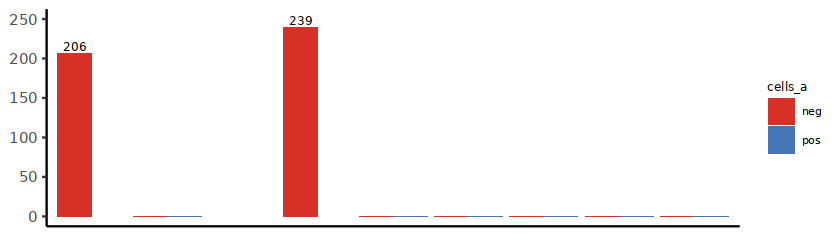

In [27]:
options(repr.plot.width=7, repr.plot.height=2)
markers_d5_other = combined_deg_seurat %>%
    filter(fgf1_day == 'Day5'  &
           grouping == 'fgf1_grouping') %>%
    filter(class == 'other')
ggp_d5_other = make_marker_bars(markers_d5_other, cluster_categories, 250) +
                theme(axis.text.x = element_blank(),
                        axis.ticks.x = element_blank())
ggp_d5_other

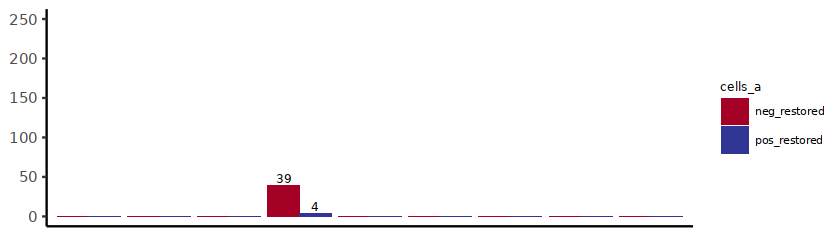

In [28]:
options(repr.plot.width=7, repr.plot.height=2)
markers_d5_other = combined_deg_seurat %>%
    filter(fgf1_day == 'Day5'  &
           grouping == 'restored_grouping') %>%
    filter(class == 'other')
ggp_d5_other_restored = make_marker_bars(markers_d5_other, cluster_categories, 250)  +
                theme(axis.text.x = element_blank(),
                        axis.ticks.x = element_blank())
ggp_d5_other_restored

Warning message:
“Removed 1 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_text()`).”


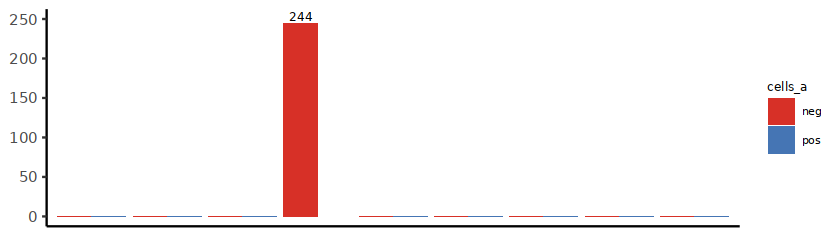

In [29]:
options(repr.plot.width=7, repr.plot.height=2)
markers_d14_other = combined_deg_seurat %>%
    filter(fgf1_day == 'Day14'  &
           grouping == 'fgf1_grouping') %>%
    filter(class == 'other')
ggp_d14_other = make_marker_bars(markers_d14_other, cluster_categories, 250)  +
                theme(axis.text.x = element_blank(),
                        axis.ticks.x = element_blank())
ggp_d14_other

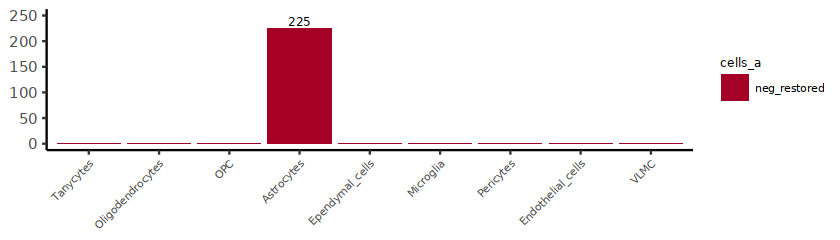

In [30]:
options(repr.plot.width=7, repr.plot.height=2)
markers_d14_other = combined_deg_seurat %>%
    filter(fgf1_day == 'Day14'  &
           grouping == 'restored_grouping') %>%
    filter(class == 'other')
ggp_d14_other_restored = make_marker_bars(markers_d14_other, cluster_categories, 250)
ggp_d14_other_restored

Warning message:
“Removed 4 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_text()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_text()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_text()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_text()`).”


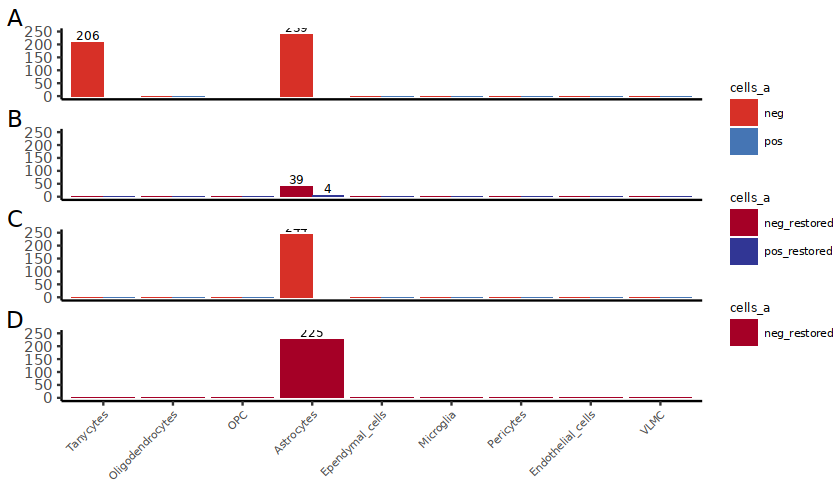

In [31]:
options(repr.plot.width=7, repr.plot.height=4)
layout <- '
A
B
C
D
'
ggp_all_other = wrap_plots(A = ggp_d5_other,
               B = ggp_d5_other_restored,
               C = ggp_d14_other,
               D = ggp_d14_other_restored,
        design = layout) +
    plot_layout(guides = 'collect') & 
      theme(plot.margin = margin(2, 0, 0, 2)) 

ggp_all_other = ggp_all_other + plot_annotation(tag_levels = c('A', 'B', 'C', 'D'))

ggp_all_other %>% ggsave('deg_count_plot_other.pdf', plot = ., width = 7, height=4)
ggp_all_other

In [32]:
cluster_categories = labels_classes_tib %>% filter(class == 'neuron') %>% pull(cluster)
cluster_categories

[1] "Sst/Pthlh"         "Nfix/Nfib"         "Met/Prlh"         
 [4] "Agrp"              "Sim1/Ebf3"         "Fezf1_3"          
 [7] "Pou6f2/Prkcq/Whrn" "Dlk1_1"            "Slc17a6/Trhr"     
[10] "Esr1_1"            "Tmem215/Dach2"     "Sst/Nts"          
[13] "Sst/Unc13c"        "Irx5/Lmx1a"        "Htr3b"            
[16] "Hdc"               "Lepr_8"            "Nfib_1"           
[19] "Lepr_9"            "Ppp1r17/Tafa4"     "Dlk1_2"           
[22] "Arx/Nr5a2"         "Lepr_7"            "Kiss1/Tac2"       
[25] "Met/Pappa2"        "Trh/Lef1"          "Gpr50/Tac2"       
[28] "Tmem215/Greb1"     "Ghrh"              "unassigned(2)"    
[31] "Lepr_4"            "Pomc/Ttr"          "Lepr_6"           
[34] "Tbx19/Pirt"        "Pomc/Glipr1"       "Pomc/Anxa2"       
[37] "Npsr1/Epha3"       "Trh/Cxcl12"        "Esr1_2"           
[40] "Nfib_2"            "Nfix/Nfib/Lhx6"    "Reln/Lef1"        
[43] "Esr1_3"            "Lepr_5"            "Th/Nfib"          
[46] "Ppp1r17"           "Lepr_3"            "Foxp2_3"          
[49] "Th/Slc6a3"         "Nfib_3"            "Fezf1_2"          
[52] "Ppp1r17/Ltbp1"     "Fezf1_1"           "Lpar1_oligo"      
[55] "Sim1/Rprm"         "Nfix/Nfib/Hgf"     "Esr1_4"           
[58] "Lepr_1"

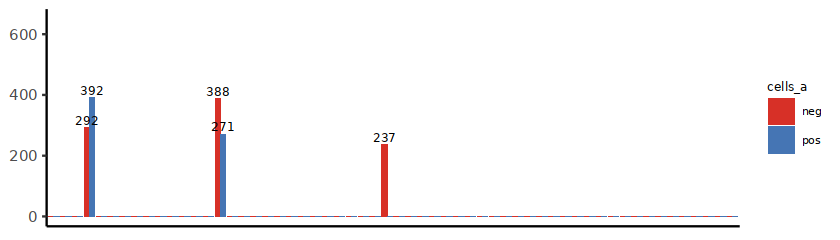

In [33]:
options(repr.plot.width=7, repr.plot.height=2)
markers_d5_neuron = combined_deg_seurat %>%
    filter(fgf1_day == 'Day5'  &
           grouping == 'fgf1_grouping') %>%
    filter(class == 'neuron')
ggp_d5_neuron = make_marker_bars(markers_d5_neuron, cluster_categories, 650) +
                theme(axis.text.x = element_blank(),
                        axis.ticks.x = element_blank())
ggp_d5_neuron

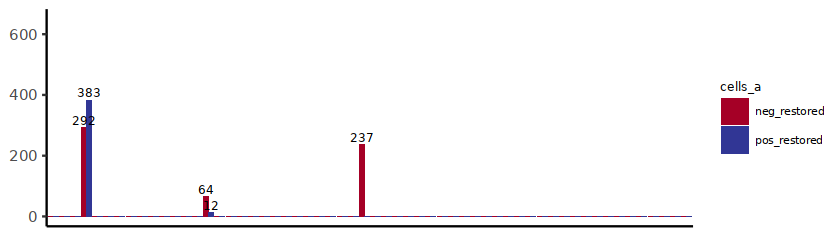

In [34]:
options(repr.plot.width=7, repr.plot.height=2)
markers_d5_neuron = combined_deg_seurat %>%
    filter(fgf1_day == 'Day5'  &
           grouping == 'restored_grouping') %>%
    filter(class == 'neuron')
ggp_d5_neuron_restored = make_marker_bars(markers_d5_neuron, cluster_categories, 650)  +
                theme(axis.text.x = element_blank(),
                        axis.ticks.x = element_blank())
ggp_d5_neuron_restored

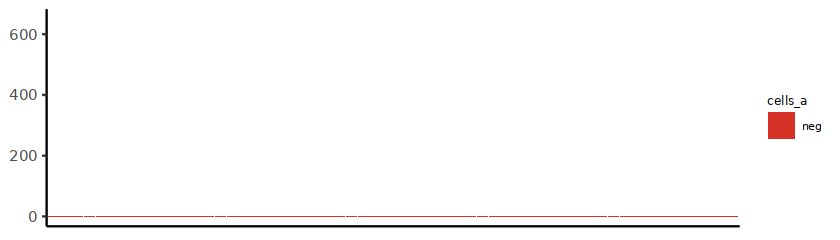

In [35]:
options(repr.plot.width=7, repr.plot.height=2)
markers_d14_neuron = combined_deg_seurat %>%
    filter(fgf1_day == 'Day14'  &
           grouping == 'fgf1_grouping') %>%
    filter(class == 'neuron')
ggp_d14_neuron = make_marker_bars(markers_d14_neuron, cluster_categories, 650)  +
                theme(axis.text.x = element_blank(),
                        axis.ticks.x = element_blank())
ggp_d14_neuron

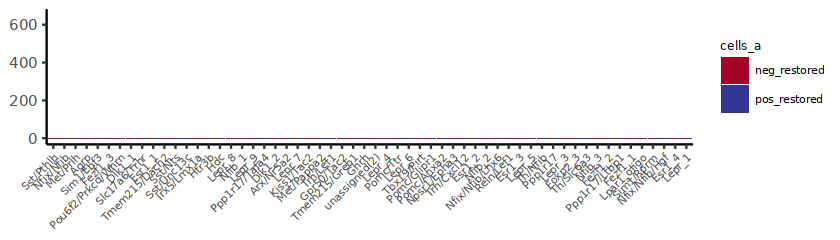

In [36]:
options(repr.plot.width=7, repr.plot.height=2)
markers_d14_neuron = combined_deg_seurat %>%
    filter(fgf1_day == 'Day14'  &
           grouping == 'restored_grouping') %>%
    mutate(cells_a = factor(cells_a, levels=c('neg_restored', 'pos_restored'))) %>%
    filter(class == 'neuron')
ggp_d14_neuron_restored = make_marker_bars(markers_d14_neuron, cluster_categories, 650)
ggp_d14_neuron_restored

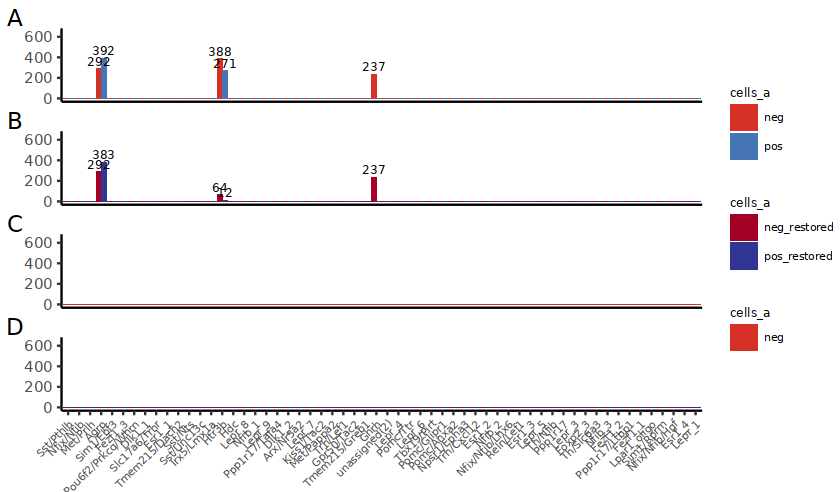

In [37]:
options(repr.plot.width=7, repr.plot.height=4.1)
layout <- '
A
B
C
D
'
ggp_all_neuron = wrap_plots(A = ggp_d5_neuron,
               B = ggp_d5_neuron_restored,
               C = ggp_d14_neuron,
               D = ggp_d14_neuron_restored,
        design = layout) +
    plot_layout(guides = 'collect') & 
      theme(plot.margin = margin(2, 0, 0, 2))  

# + plot_annotation(tag_levels = c('A', 'B', 'C', 'D'))

ggp_all_neuron = ggp_all_neuron + plot_annotation(tag_levels = c('A', 'B', 'C', 'D'))

ggp_all_neuron %>% ggsave('deg_count_plot_neuron.pdf', plot = ., width = 7, height=4)
ggp_all_neuron

In [38]:
combined_deg_seurat %>% filter(str_detect(GeneID, 'Fgfr'))

tag,data_day,cluster,class,fgf1_day,fgf1_comparison,bl6_day,bl6_comparison,grouping,cells_a,cells_b,GeneID,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,ensmusg,gsea_sort_score,n_cells_valid
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>
Agrp___Day5.obob5v5__v__Day5.obobBL6d5___bl6_grouping.neg_vs_none,all,Agrp,neuron,Day5,obob5v5,Day5,obobBL6d5,bl6_grouping,neg,none,Fgfr4,6.516660e-16,2.0271634,0.556,0.300,1.303332e-12,ENSMUSG00000005320,24.092725,NA
Htr3b___Day5.obob5v5__v__Day5.obobBL6d5___bl6_grouping.pos_vs_none,all,Htr3b,neuron,Day5,obob5v5,Day5,obobBL6d5,bl6_grouping,pos,none,Fgfrl1,1.090905e-06,1.3619300,0.031,0.166,2.181809e-03,ENSMUSG00000008090,3.624345,NA
OPC___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.neg_vs_none,all,OPC,other,Day5,obob5v5,Day5,obobBL6d5,fgf1_grouping,neg,none,Fgfr2,4.604762e-43,0.4624115,0.938,0.426,9.209523e-40,ENSMUSG00000030849,18.050586,TRUE


In [39]:
combined_deg_seurat %>% filter(str_detect(GeneID, 'Fgfr'))

tag,data_day,cluster,class,fgf1_day,fgf1_comparison,bl6_day,bl6_comparison,grouping,cells_a,cells_b,GeneID,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,ensmusg,gsea_sort_score,n_cells_valid
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>
Agrp___Day5.obob5v5__v__Day5.obobBL6d5___bl6_grouping.neg_vs_none,all,Agrp,neuron,Day5,obob5v5,Day5,obobBL6d5,bl6_grouping,neg,none,Fgfr4,6.516660e-16,2.0271634,0.556,0.300,1.303332e-12,ENSMUSG00000005320,24.092725,NA
Htr3b___Day5.obob5v5__v__Day5.obobBL6d5___bl6_grouping.pos_vs_none,all,Htr3b,neuron,Day5,obob5v5,Day5,obobBL6d5,bl6_grouping,pos,none,Fgfrl1,1.090905e-06,1.3619300,0.031,0.166,2.181809e-03,ENSMUSG00000008090,3.624345,NA
OPC___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.neg_vs_none,all,OPC,other,Day5,obob5v5,Day5,obobBL6d5,fgf1_grouping,neg,none,Fgfr2,4.604762e-43,0.4624115,0.938,0.426,9.209523e-40,ENSMUSG00000030849,18.050586,TRUE


In [40]:
combined_deg_seurat %>% filter(str_detect(GeneID, 'Tcf7l2'))

tag,data_day,cluster,class,fgf1_day,fgf1_comparison,bl6_day,bl6_comparison,grouping,cells_a,cells_b,GeneID,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,ensmusg,gsea_sort_score,n_cells_valid
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>
Agrp___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.pos_vs_none,all,Agrp,neuron,Day5,obob5v5,Day5,obobBL6d5,fgf1_grouping,pos,none,Tcf7l2,6.136394e-10,0.12608811,0.281,0.432,1.227279e-06,ENSMUSG00000024985,0.7453140,TRUE
Agrp___Day5.obob5v5__v__Day5.obobBL6d5___restored_grouping.pos_restored_vs_none,all,Agrp,neuron,Day5,obob5v5,Day5,obobBL6d5,restored_grouping,pos_restored,none,Tcf7l2,8.607673e-09,0.07340814,0.257,0.432,1.721535e-05,ENSMUSG00000024985,0.3497226,TRUE
OPC___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.pos_vs_none,all,OPC,other,Day5,obob5v5,Day5,obobBL6d5,fgf1_grouping,pos,none,Tcf7l2,6.407708e-70,2.79441092,0.894,0.457,1.281542e-66,ENSMUSG00000024985,184.1300714,TRUE
Sst__Unc13c___Day5.obob5v5__v__Day5.obobBL6d5___restored_grouping.pos_restored_vs_none,all,Sst__Unc13c,NA,Day5,obob5v5,Day5,obobBL6d5,restored_grouping,pos_restored,none,Tcf7l2,2.850917e-06,0.09479889,0.066,0.171,5.701834e-03,ENSMUSG00000024985,0.2127273,TRUE
Tmem215__Greb1___Day5.obob5v5__v__Day5.obobBL6d5___bl6_grouping.pos_vs_none,all,Tmem215__Greb1,NA,Day5,obob5v5,Day5,obobBL6d5,bl6_grouping,pos,none,Tcf7l2,5.906315e-10,0.43136683,0.882,0.714,1.181263e-06,ENSMUSG00000024985,2.5569930,NA


In [41]:
combined_deg_seurat %>% filter(cluster == 'b1_Tanycytes') %>% arrange(p_val_adj)

tag,data_day,cluster,class,fgf1_day,fgf1_comparison,bl6_day,bl6_comparison,grouping,cells_a,cells_b,GeneID,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,ensmusg,gsea_sort_score,n_cells_valid
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>


In [42]:
combined_deg_seurat %>% write_xlsx('combined_deg_seurat_d5_d14.xlsx')